# Objective of this project is to combine historical usage pattern along with open data sources like weather data to forecast cab booking demand in the city.

In [2]:
import numpy as np

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR


In [7]:
pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.1 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
from xgboost import XGBRFRegressor
from sklearn.ensemble import GradientBoostingRegressor

Data Collection and Preparation

In [5]:
df_train = pd.read_csv('/Users/apple/ML:AI/Projects Upload/Cab booking/data/Dataset/train.csv')

In [6]:
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012


In [7]:
col = ['Total_booking']
df_train_label = pd.read_csv('/Users/apple/ML:AI/Projects Upload/Cab booking/data/Dataset/train_label.csv',header=None,names=col)

In [8]:
#apendinf the train_label datset to train.csv as Total_booking column
train=df_train.join(df_train_label)

In [9]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184
...,...,...,...,...,...,...,...,...,...,...
8703,1/16/2012 6:00,Spring,1,0,Clear + Few clouds,4.10,6.820,54,6.0032,13
8704,11/10/2011 1:00,Winter,0,1,Mist + Cloudy,16.40,20.455,87,0.0000,11
8705,4/12/2011 3:00,Summer,0,1,Mist + Cloudy,23.78,27.275,56,8.9981,1
8706,11/7/2012 1:00,Winter,0,1,Mist + Cloudy,11.48,13.635,61,16.9979,92


In [10]:
df_test = pd.read_csv('/Users/apple/ML:AI/Projects Upload/Cab booking/data/Dataset/test.csv')

In [11]:
col=['Total_bookings']
df_test_label = pd.read_csv('/Users/apple/ML:AI/Projects Upload/Cab booking/data/Dataset/test_label.csv',header=None,names=col)

In [12]:
#appending the train_label dataset to train.csv as Total_booking column
test = df_test.join(df_test_label)

In [13]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_bookings
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,256
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,87
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,11
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,84
4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,668


## Feature Engineering

In [14]:
from datetime import datetime
import calendar

In [15]:
#Create new columns from date time column
train['datetime']

0         5/2/2012 19:00
1          9/5/2012 4:00
2         1/13/2011 9:00
3       11/18/2011 16:00
4        9/13/2011 13:00
              ...       
8703      1/16/2012 6:00
8704     11/10/2011 1:00
8705      4/12/2011 3:00
8706      11/7/2012 1:00
8707     1/10/2011 10:00
Name: datetime, Length: 8708, dtype: object

In [16]:
train.dtypes

datetime          object
season            object
holiday            int64
workingday         int64
weather           object
temp             float64
atemp            float64
humidity           int64
windspeed        float64
Total_booking      int64
dtype: object

In [17]:
train['date'] = train.datetime.apply(lambda x :x.split()[0])


In [18]:
train['hour'] = train.datetime.apply(lambda x :x.split()[1].split(":")[0])

In [19]:
train["weekday"] = train.datetime.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString, "%m/%d/%Y %H:%M").weekday()])

In [20]:
test['date'] = test.datetime.apply(lambda x : x.split()[0])

In [21]:
test['hour'] = test.datetime.apply(lambda x : x.split()[1].split(":")[0])

In [22]:
test["weekday"] = test.date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString, "%m/%d/%Y").weekday()])

In [23]:
test["month"] = test.date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString, "%m/%d/%Y").month])

In [24]:
train["month"] = train.date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString, "%m/%d/%Y").month])

In [25]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,date,hour,weekday,month
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,5/2/2012,19,Wednesday,May
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,9/5/2012,4,Wednesday,September
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,1/13/2011,9,Thursday,January
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,11/18/2011,16,Friday,November
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,9/13/2011,13,Tuesday,September


## Visualize data using different visualizations to gain meaningful insights.


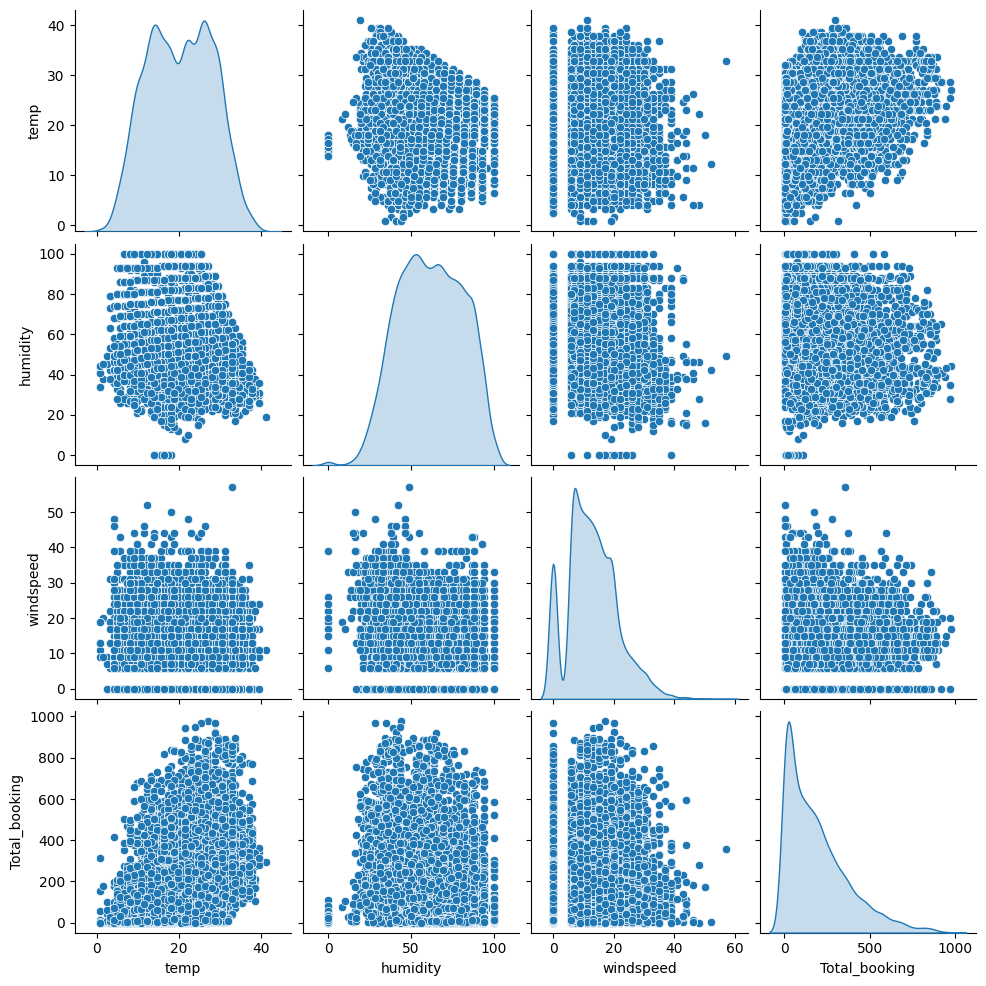

In [26]:
#Explore the data
#We use an sns pairplot for this
sns.pairplot(train[["temp","humidity","windspeed","Total_booking"]], diag_kind='kde')

2. Outlier Analysis

In [27]:
train.describe()

,holiday,workingday,temp,atemp,humidity,windspeed,Total_booking
count,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000
mean,0.028480,0.680294,20.243020,23.655552,61.649173,12.843891,193.007005
std,0.166348,0.466389,7.813494,8.501107,19.199578,8.190314,181.552211
min,0.000000,0.000000,0.820000,0.760000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,13.940000,16.665000,46.000000,7.001500,43.000000
50%,0.000000,1.000000,20.500000,24.240000,61.000000,12.998000,148.000000
75%,0.000000,1.000000,26.240000,31.060000,77.000000,16.997900,286.000000
max,1.000000,1.000000,41.000000,45.455000,100.000000,56.996900,977.000000


<AxesSubplot: >

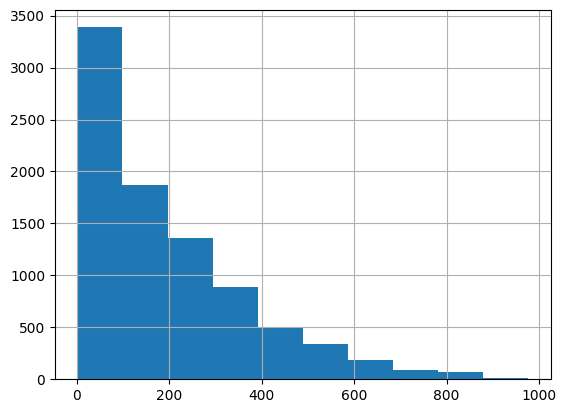

In [28]:
train['Total_booking'].hist()

In [29]:
rev_stat=train.Total_booking.describe()

In [30]:
print(rev_stat)

count    8708.000000
mean      193.007005
std       181.552211
min         1.000000
25%        43.000000
50%       148.000000
75%       286.000000
max       977.000000
Name: Total_booking, dtype: float64


In [31]:
iqr=rev_stat['75%']-rev_stat['25%']

In [32]:
upper = rev_stat['75%']+1.5*iqr
lower =rev_stat['25%']-1.5*iqr
print('iqr=',iqr)
print('The upper and lower bounds for suspected outliers are {} and {} '.format(lower,upper))

iqr= 243.0
The upper and lower bounds for suspected outliers are -321.5 and 650.5 


In [33]:
outliers=train[train.Total_booking>upper].index.tolist()
train[train.Total_booking>upper]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,date,hour,weekday,month
5,8/17/2012 17:00,Fall,0,1,Clear + Few clouds,33.62,12.120,36,22.0028,791,8/17/2012,17,Friday,August
27,5/2/2012 18:00,Summer,0,1,Clear + Few clouds,22.96,26.515,73,15.0013,813,5/2/2012,18,Wednesday,May
30,7/10/2012 17:00,Fall,0,1,Clear + Few clouds,31.98,35.605,49,12.9980,872,7/10/2012,17,Tuesday,July
52,6/5/2012 18:00,Summer,0,1,Clear + Few clouds,24.60,31.060,43,12.9980,790,6/5/2012,18,Tuesday,June
70,5/18/2012 18:00,Summer,0,1,Clear + Few clouds,26.24,31.060,38,15.0013,669,5/18/2012,18,Friday,May
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8478,3/14/2012 8:00,Spring,0,1,Clear + Few clouds,18.04,21.970,82,0.0000,662,3/14/2012,8,Wednesday,March
8582,10/15/2012 8:00,Winter,0,1,Mist + Cloudy,24.60,30.305,64,26.0027,737,10/15/2012,8,Monday,October
8676,5/12/2012 13:00,Summer,0,0,Clear + Few clouds,26.24,31.060,36,12.9980,659,5/12/2012,13,Saturday,May
8681,8/8/2012 17:00,Fall,0,1,Mist + Cloudy,32.80,37.880,55,19.0012,858,8/8/2012,17,Wednesday,August


In [34]:
#Orginal data with outliers
train.shape

(8708, 14)

In [35]:
for index in outliers:
    train.drop(index,inplace=True)

In [36]:
#After removing outliers
train.shape

(8466, 14)

## Missing value analysis

In [37]:
#We observed there is no missing values in our dataset
train.isnull().sum()

datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
Total_booking    0
date             0
hour             0
weekday          0
month            0
dtype: int64

Visualizing Total_booking vs other features to generate insights 


<AxesSubplot: xlabel='weather', ylabel='Total_booking'>

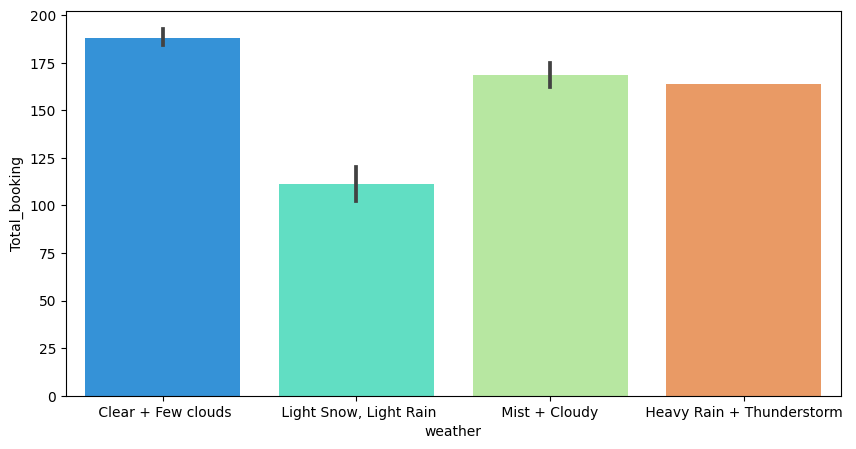

In [38]:
plt.figure(figsize=(10,5))
sns.barplot(x='weather',y='Total_booking',data=train,palette='rainbow')

<AxesSubplot: xlabel='weekday', ylabel='Total_booking'>

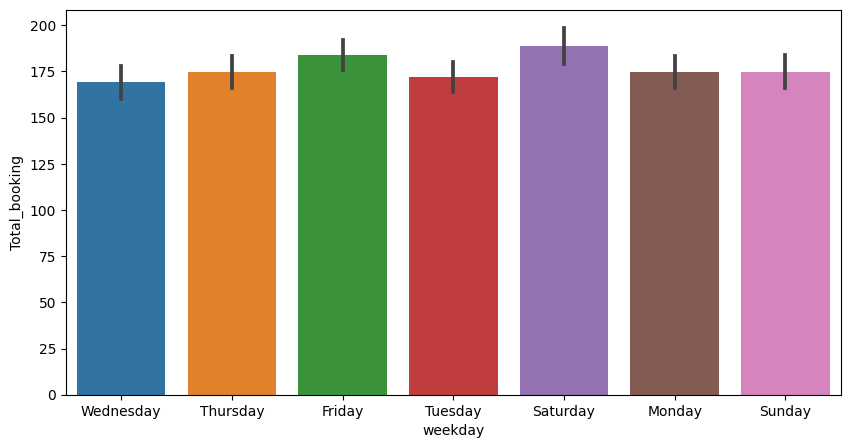

In [39]:
plt.figure(figsize=(10,5))
sns.barplot(x='weekday',y='Total_booking',data = train)

<AxesSubplot: xlabel='month', ylabel='Total_booking'>

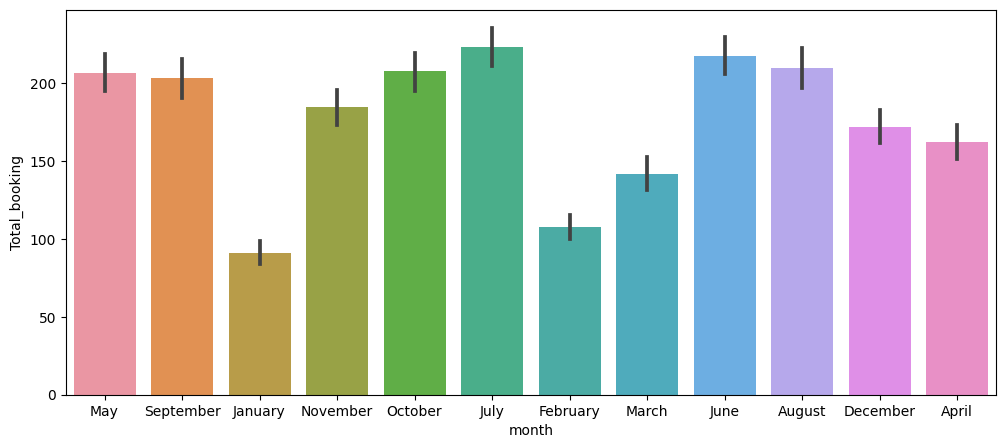

In [40]:
plt.figure(figsize=(12,5))
sns.barplot(x='month',y = 'Total_booking',data = train)

<AxesSubplot: xlabel='season', ylabel='Total_booking'>

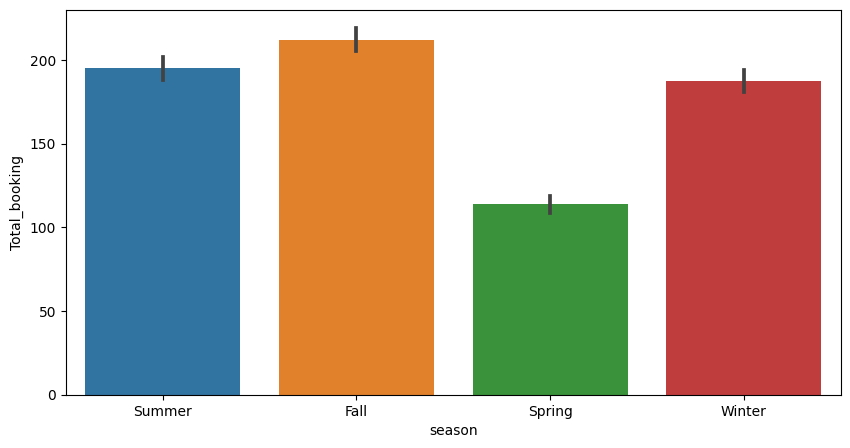

In [41]:
plt.figure(figsize=(10,5))
sns.barplot(x='season',y='Total_booking',data=train)

## Correlation Analysis

/var/folders/lm/7w4h8ttn41q68dd9918mhcjh0000gn/T/ipykernel_3230/1859479183.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = train.corr()


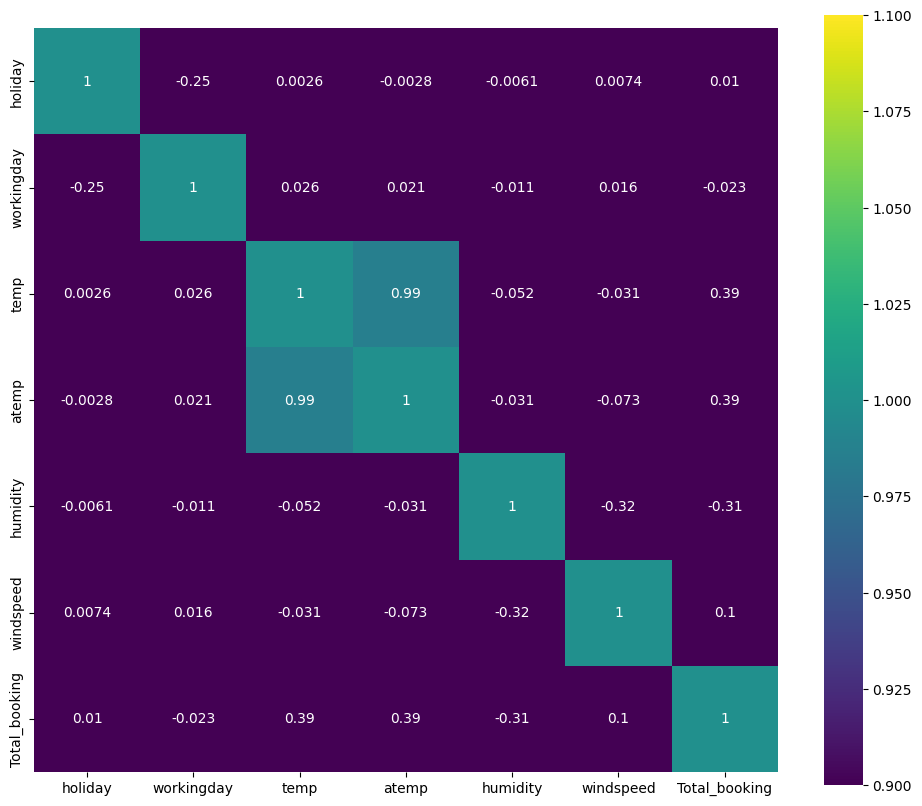

In [42]:
correlation = train.corr()
fig = plt.figure(figsize =(12,10))
sns.heatmap(correlation, cmap='viridis', annot=True, vmax=1, square =True, vmin=1)
plt.show()

In [43]:
del(train["atemp"])# remove to avoid multicolinearitu -Temp and atemp

## Feature Engineering

In [44]:
del(train["datetime"])

In [45]:
del(train["date"])

In [46]:
train.dtypes

season            object
holiday            int64
workingday         int64
weather           object
temp             float64
humidity           int64
windspeed        float64
Total_booking      int64
hour              object
weekday           object
month             object
dtype: object

In [47]:
train.columns.nunique()

11

In [48]:
train = pd.get_dummies(train)
train.head()

,holiday,workingday,temp,humidity,windspeed,Total_booking,season_Fall,season_Spring,season_Summer,season_Winter,...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
0,0,1,22.14,77,16.9979,504,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,28.70,79,19.0012,5,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,1,5.74,50,22.0028,139,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1,13.94,29,8.9981,209,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0,1,30.34,51,19.0012,184,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [49]:
train.shape

(8466, 57)

## Splitting into X and Y

In [50]:
X = train.drop('Total_booking',axis=1)
y = train['Total_booking']
from sklearn.model_selection import train_test_split
X_train,X_test ,y_train, y_test = train_test_split(X, y, test_size= 0.2,random_state = 0)

In [51]:
print(X_train.shape)
print(X_test.shape)


(6772, 56)
(1694, 56)


## Regression Analysis


In [52]:
#Decision tree model
DT_model = DecisionTreeRegressor()
DT_model.fit(X_train,y_train)
y_pred_DT=DT_model.predict(X_test)
y_pred_train=DT_model.predict(X_train)

In [53]:
# Random Forest
RF_model = RandomForestRegressor( random_state = 0)
RF_model.fit(X_train,y_train)
y_pred_RF = RF_model.predict(X_test)
y_pred_train =RF_model.predict(X_train)

In [54]:
#XG boost
XG_model = XGBRFRegressor()
XG_model.fit(X_train,y_train)
y_pred_XG = XG_model.predict(X_test)

In [55]:
#SVM
SVM_model = SVR()
SVM_model.fit(X_train, y_train)
y_pred_SVM = SVM_model.predict(X_test)

In [56]:
#KNN
KNN_model = KNeighborsRegressor()
KNN_model.fit(X_train,y_train)
y_pred_KNN = KNN_model.predict(X_test)

In [57]:
#Gradient Boosting
GB_model = GradientBoostingRegressor()
GB_model.fit(X_train,y_train)
y_pred_GB = GB_model.predict(X_test)

## Performance Metrics

In [58]:
from sklearn.metrics import r2_score, mean_squared_error

In [59]:
print("R squared value for DT:", r2_score(y_test, y_pred_DT))


R squared value for DT: 0.656839320820372


In [60]:
print("R squared value for RF:", r2_score(y_test, y_pred_RF))

R squared value for RF: 0.8354197771760357


In [61]:
print("R squared value for XG:", r2_score(y_test, y_pred_XG))

R squared value for XG: 0.5143997704729568


In [62]:
print("R squared value for SVM:", r2_score(y_test, y_pred_SVM))

R squared value for SVM: 0.1679652652268958


In [63]:
print("R squared value for KNN:", r2_score(y_test, y_pred_KNN))

R squared value for KNN: 0.24155879838701577


In [64]:
print("R squared value for GB:", r2_score(y_test, y_pred_GB))

R squared value for GB: 0.7178058017450006


In [65]:
print("MSE for DT:", mean_squared_error(y_test, y_pred_DT))

MSE for DT: 8616.447609208974


In [66]:
print("MSE for RF:", mean_squared_error(y_test, y_pred_RF))
print("MSE for XG:", mean_squared_error(y_test, y_pred_XG))
print("MSE for SVM:", mean_squared_error(y_test, y_pred_SVM))
print("MSE for KNN:", mean_squared_error(y_test, y_pred_KNN))
print("MSE for GB:", mean_squared_error(y_test, y_pred_GB))

MSE for RF: 4132.45733999822
MSE for XG: 12192.973119013497
MSE for SVM: 20891.623476073764
MSE for KNN: 19043.75785123967
MSE for GB: 7085.635599917184


## Ensemble Model

In [67]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
RF_reg = RandomForestRegressor(n_estimators = 1000, n_jobs = -1, random_state=0)
#fit the model
RF_reg = RF_reg.fit(X_train,y_train)
#Predict the model
y_pred_RFR = RF_reg.predict(X_test)
print("Rsquared:",r2_score(y_test,y_pred_RFR))

Rsquared: 0.8382149833105221


## Grid search cv

In [68]:
from sklearn.model_selection import GridSearchCV
#Create the parameter grid
param_grid = {
    'bootstrap':[True],
    'max_depth':[20,30,40,],
    'n_estimators':[300,500,1000,1200]
}
#Initiate the grid search model
grid_search = GridSearchCV(estimator=RF_reg, param_grid= param_grid,cv=3,n_jobs=-1,verbose = 2)
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END .....bootstrap=True, max_depth=20, n_estimators=300; total time=   4.7s
[CV] END ....bootstrap=True, max_depth=20, n_estimators=1000; total time=  18.8s
[CV] END ....bootstrap=True, max_depth=30, n_estimators=1000; total time=  21.1s


/Users/apple/miniforge3/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END .....bootstrap=True, max_depth=20, n_estimators=300; total time=   4.9s
[CV] END ....bootstrap=True, max_depth=20, n_estimators=1200; total time=  22.7s
[CV] END ....bootstrap=True, max_depth=30, n_estimators=1200; total time=  25.1s
[CV] END .....bootstrap=True, max_depth=20, n_estimators=300; total time=   4.9s
[CV] END ....bootstrap=True, max_depth=20, n_estimators=1200; total time=  22.5s
[CV] END ....bootstrap=True, max_depth=30, n_estimators=1200; total time=  25.6s
[CV] END .....bootstrap=True, max_depth=20, n_estimators=500; total time=   8.9s
[CV] END .....bootstrap=True, max_depth=30, n_estimators=300; total time=   6.5s
[CV] END .....bootstrap=True, max_depth=30, n_estimators=500; total time=  11.0s
[CV] END ....bootstrap=True, max_depth=30, n_estimators=1000; total time=  21.1s
[CV] END ....bootstrap=True, max_depth=40, n_estimators=1000; total time=  17.7s
[CV] END .....bootstrap=True, max_depth=20, n_estimators=500; total time=   8.8s
[CV] END ....bootstrap=True,

GridSearchCV(cv=3,
             estimator=RandomForestRegressor(n_estimators=1000, n_jobs=-1,
                                             random_state=0),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [20, 30, 40],
                         'n_estimators': [300, 500, 1000, 1200]},
             verbose=2)

In [69]:
grid_search.best_params_

{'bootstrap': True, 'max_depth': 40, 'n_estimators': 1200}

In [70]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=40, n_estimators=1200, n_jobs=-1,
                      random_state=0)

In [71]:
cvrf_grid = grid_search.best_estimator_

In [72]:
#Predict the model
y_pred_clf = cvrf_grid.predict(X_test)
print("R squared value for GridSearch:", r2_score(y_test, y_pred_clf))
print("MSE for GridSearch:", mean_squared_error(y_test,y_pred_clf))

R squared value for GridSearch: 0.8382697341494291
MSE for GridSearch: 4060.897553461924


<AxesSubplot: >

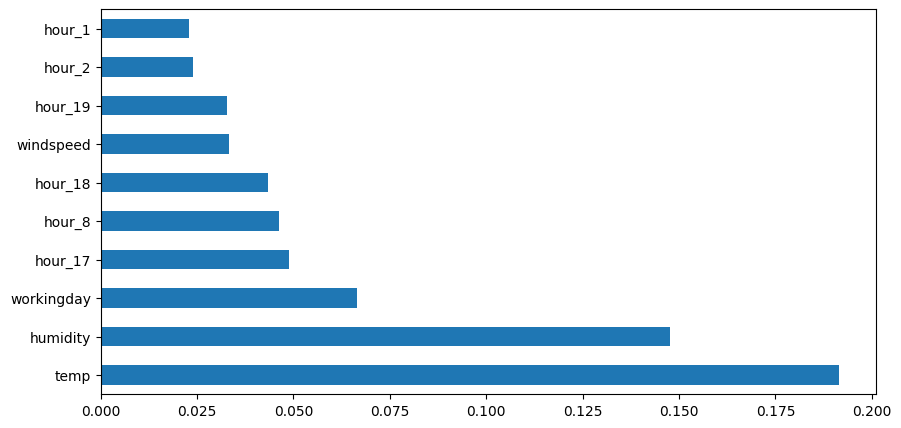

In [73]:
#Feature Importance
feat_importances = pd.Series(cvrf_grid.feature_importances_, index=X_train.columns)
f, ax = plt.subplots(figsize=(10,5))
feat_importances.nlargest(10).plot(kind='barh')

## Comparing with the test-project dataset and predicting the output with gridsearch cv model

In [74]:
test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_bookings,date,hour,weekday,month
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,256,5/10/2012,11,Thursday,May
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,87,6/9/2012,7,Saturday,June
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,11,3/6/2011,20,Sunday,March
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,84,10/13/2011,11,Thursday,October
4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,668,6/2/2012,12,Saturday,June
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2173,3/8/2012 3:00,Spring,0,1,Clear + Few clouds,18.86,22.725,63,26.0027,3,3/8/2012,3,Thursday,March
2174,1/12/2012 12:00,Spring,0,1,Mist + Cloudy,13.94,17.425,81,7.0015,144,1/12/2012,12,Thursday,January
2175,3/7/2012 22:00,Spring,0,1,Clear + Few clouds,18.86,22.725,59,19.9995,159,3/7/2012,22,Wednesday,March
2176,5/12/2011 5:00,Summer,0,1,Clear + Few clouds,17.22,21.210,94,8.9981,29,5/12/2011,5,Thursday,May


In [75]:
del(test['datetime'])
del(test['atemp'])
del(test["date"])

In [76]:
test.shape

(2178, 11)

In [77]:
test.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'humidity',
       'windspeed', 'Total_bookings', 'hour', 'weekday', 'month'],
      dtype='object')

In [78]:
test = pd.get_dummies(test)
test.head()

,holiday,workingday,temp,humidity,windspeed,Total_bookings,season_Fall,season_Spring,season_Summer,season_Winter,...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
0,0,1,21.32,48,35.0008,256,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,23.78,64,7.0015,87,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,11.48,100,27.9993,11,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,1,25.42,83,0.0000,84,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0,0,25.42,43,23.9994,668,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [79]:
test.shape

(2178, 56)

In [80]:
#Fitting Grid search model to test dataset
New_pred = cvrf_grid.predict(test)

/Users/apple/miniforge3/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Total_bookings
Feature names seen at fit time, yet now missing:
- weather_ Heavy Rain + Thunderstorm 

  warnings.warn(message, FutureWarning)


In [81]:
print("R squared for prediction v/s test label:", r2_score(df_test_label, New_pred))
print("MSE for prediction v/s test_label:", mean_squared_error(df_test_label, New_pred))

R squared for prediction v/s test label: 0.797753772723576
MSE for prediction v/s test_label: 6508.497062539411


## Appending the prediction value columns with the test-project dataset.

In [82]:
New_pred = pd.DataFrame(New_pred)
New_pred.columns = ['Predictions']
New_pred

,Predictions
0,214.892812
1,157.762059
2,77.260000
3,164.358417
4,444.000000
...,...
2173,12.273333
2174,138.090833
2175,135.948958
2176,24.306667


In [85]:
df_test = pd.read_csv('/Users/apple/ML:AI/Projects Upload/Cab booking/data/Dataset/test.csv')
col = ['Total booking']
df_test_label = pd.read_csv('/Users/apple/ML:AI/Projects Upload/Cab booking/data/Dataset/test_label.csv',header = None, names = col)
test = df_test.join(df_test_label)
Dataset_testpred = test.join(New_pred)
Dataset_testpred

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total booking,Predictions
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,256,214.892812
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,87,157.762059
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,11,77.260000
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,84,164.358417
4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,668,444.000000
...,...,...,...,...,...,...,...,...,...,...,...
2173,3/8/2012 3:00,Spring,0,1,Clear + Few clouds,18.86,22.725,63,26.0027,3,12.273333
2174,1/12/2012 12:00,Spring,0,1,Mist + Cloudy,13.94,17.425,81,7.0015,144,138.090833
2175,3/7/2012 22:00,Spring,0,1,Clear + Few clouds,18.86,22.725,59,19.9995,159,135.948958
2176,5/12/2011 5:00,Summer,0,1,Clear + Few clouds,17.22,21.210,94,8.9981,29,24.306667


[CV] END ....bootstrap=True, max_depth=20, n_estimators=1000; total time=  18.4s
[CV] END .....bootstrap=True, max_depth=30, n_estimators=500; total time=  10.4s
[CV] END ....bootstrap=True, max_depth=30, n_estimators=1200; total time=  25.3s
[CV] END ....bootstrap=True, max_depth=40, n_estimators=1000; total time=  18.5s
[CV] END ....bootstrap=True, max_depth=40, n_estimators=1200; total time=  15.7s
